In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import os
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray
from PIL import Image
import glob
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Any results you write to the current directory are saved as output.

['testdataset', 'mhmodel']


2022-01-07 07:54:39.721949: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
test_dir = '../input/testdataset/TEST_CROPPED'
df = pd.read_csv('../input/testdataset/TEST_CROPPED/Test_Set.csv')
df.head(30)

Unnamed: 0   ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ...  \
0            0    2             1   0     0   0   0    0     0     0  ...   
1            1    8             1   0     0   0   0    0     0     0  ...   
2            2  523             1   0     0   1   0    0     0     0  ...   
3            3  525             1   0     0   0   1    0     0     0  ...   
4            4  528             1   0     1   0   0    1     0     0  ...   
5            5  529             1   1     0   0   0    0     0     1  ...   
6            6  530             1   1     0   0   0    0     0     1  ...   
7            7  533             1   1     0   1   0    0     0     0  ...   
8            8   22             1   0     0   0   0    0     0     0  ...   
9            9  535             1   0     0   0   1    0     0     1  ...   
10          10   26             1   1     0   0   0    0     0     0  ...   
11          11  539             1   0     0   1   0    0     0     1  ...   
12          12   27             1   0     0   0   0    0     0     1  ...   
13          13  542             1   0     0   0   0    0     0     1  ...   
14          14   31             1   0     0   0   0    0     0     0  ...   
15          15  546             1   0     0   0   0    0     1     0  ...   
16          16  548             1   0     0   0   0    0     0     0  ...   
17          17   37             1   0     0   0   0    0     0     1  ...   
18          18  549             1   0     0   1   0    0     0     0  ...   
19          19   46             1   0     0   0   0    0     0     0  ...   
20          20  558             1   0     0   1   0    0     0     0  ...   
21          21   49             1   0     0   0   0    0     0     1  ...   
22          22   50             1   0     0   0   0    0     0     0  ...   
23          23   54             1   0     0   0   0    0     0     1  ...   
24          24   55             1   0     0   0   0    0     0     0  ...   
25          25   56             1   0     0   0   0    0     0     0  ...   
26          26   57             1   0     0   0   0    0     0     1  ...   
27          27   59             1   0     0   0   0    0     0     1  ...   
28          28   62             1   0     0   0   0    0     0     1  ...   
29          29   63             1   0     0   0   0    0     0     1  ...   

    AION  PT  RT  RS  CRS  EDN  RPEC  MHL  RP  OTHER  
0      0   0   0   0    0    0     0    0   0      0  
1      0   0   0   0    0    0     0    0   0      0  
2      0   0   0   0    0    0     0    0   0      0  
3      0   0   0   0    0    0     0    0   0      0  
4      0   0   0   0    0    0     0    0   0      0  
5      0   0   0   0    0    0     0    0   0      0  
6      0   0   0   0    0    0     0    0   0      0  
7      0   0   0   0    0    0     0    0   0      0  
8      1   0   0   0    0    0     0    0   0      0  
9      0   0   0   0    0    0     0    0   0      0  
10     0   0   0   0    0    0     0    0   0      0  
11     0   0   0   0    0    0     0    0   0      0  
12     0   0   0   0    0    0     0    0   0      0  
13     0   0   0   0    0    0     0    0   0      0  
14     0   0   0   0    0    0     0    0   0      0  
15     0   0   0   0    0    0     0    0   0      0  
16     0   0   0   0    0    0     0    0   0      0  
17     0   0   0   0    0    0     0    0   0      0  
18     0   0   0   0    0    0     0    0   0      0  
19     0   0   0   0    0    0     0    0   0      0  
20     0   0   0   0    0    0     0    0   0      0  
21     0   0   0   0    0    0     0    0   0      0  
22     0   0   0   0    0    0     0    0   0      0  
23     0   0   0   0    0    0     0    1   0      0  
24     0   0   0   0    0    0     0    0   0      1  
25     0   0   0   0    0    0     0    0   0      1  
26     0   0   0   0    0    0     0    0   0      0  
27     0   0   0   0    0    0     0    0   0      0  
28     0   0   0   0 

In [3]:
df = df.sort_values(by=['ID'])
df.head(30)

Unnamed: 0  ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ...  \
0             0   2             1   0     0   0   0    0     0     0  ...   
1             1   8             1   0     0   0   0    0     0     0  ...   
8             8  22             1   0     0   0   0    0     0     0  ...   
10           10  26             1   1     0   0   0    0     0     0  ...   
12           12  27             1   0     0   0   0    0     0     1  ...   
14           14  31             1   0     0   0   0    0     0     0  ...   
181         181  34             1   0     0   0   0    0     0     0  ...   
17           17  37             1   0     0   0   0    0     0     1  ...   
182         182  40             1   0     0   0   0    0     0     0  ...   
19           19  46             1   0     0   0   0    0     0     0  ...   
21           21  49             1   0     0   0   0    0     0     1  ...   
22           22  50             1   0     0   0   0    0     0     0  ...   
23           23  54             1   0     0   0   0    0     0     1  ...   
24           24  55             1   0     0   0   0    0     0     0  ...   
25           25  56             1   0     0   0   0    0     0     0  ...   
26           26  57             1   0     0   0   0    0     0     1  ...   
27           27  59             1   0     0   0   0    0     0     1  ...   
28           28  62             1   0     0   0   0    0     0     1  ...   
29           29  63             1   0     0   0   0    0     0     1  ...   
30           30  64             1   0     0   0   0    0     0     0  ...   
31           31  65             1   0     0   0   0    0     0     0  ...   
33           33  67             1   0     0   0   0    1     0     0  ...   
36           36  70             1   0     0   0   0    1     0     0  ...   
38           38  74             1   0     0   0   0    0     0     0  ...   
183         183  75             1   0     0   0   0    0     0     0  ...   
40           40  78             1   0     0   0   0    0     0     0  ...   
42           42  81             1   0     0   0   0    1     0     0  ...   
44           44  87             1   0     1   0   0    0     0     0  ...   
45           45  92             1   0     1   0   0    0     0     0  ...   
47           47  94             1   0     1   0   0    1     0     0  ...   

     AION  PT  RT  RS  CRS  EDN  RPEC  MHL  RP  OTHER  
0       0   0   0   0    0    0     0    0   0      0  
1       0   0   0   0    0    0     0    0   0      0  
8       1   0   0   0    0    0     0    0   0      0  
10      0   0   0   0    0    0     0    0   0      0  
12      0   0   0   0    0    0     0    0   0      0  
14      0   0   0   0    0    0     0    0   0      0  
181     0   0   0   1    0    0     0    0   0      0  
17      0   0   0   0    0    0     0    0   0      0  
182     0   0   0   1    0    0     0    0   0      0  
19      0   0   0   0    0    0     0    0   0      0  
21      0   0   0   0    0    0     0    0   0      0  
22      0   0   0   0    0    0     0    0   0      0  
23      0   0   0   0    0    0     0    1   0      0  
24      0   0   0   0    0    0     0    0   0      1  
25      0   0   0   0    0    0     0    0   0      1  
26      0   0   0   0    0    0     0    0   0      0  
27      0   0   0   0    0    0     0    0   0      0  
28      0   0   0   0    0    0     0    0   0      0  
29      0   0   0   0    0    0     0    0   0      0  
30      0   0   0   0    1    0     0    0   0      0  
31      0   0   0   0    0    0     0    0   0      0  
33      0   0   0   0    0    0     0    0   0      1  
36      0   0   0   0    1    0     0    0   0      0  
38      0   0   0   0    0    0     0    0   0      0  
183     0   0   0   1    0    0     0    0   0      0  
40      0   0   0   0    0    0     0    0   0      0  
42      0   0   0   0    0    0     0    0   0      0  
44      0   0   0   0    0    0     0    0   0   

In [4]:
y = df['MH'].tolist()
print(y)
id = df['ID'].tolist()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import applications
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import cv2
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing import image

model = load_model("../input/mhmodel/MH_MODEL.h5")

2022-01-07 07:54:45.453767: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-07 07:54:45.457444: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-07 07:54:45.513719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 07:54:45.514798: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-07 07:54:45.514869: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-01-07 07:54:45.543083: I tensorflow/stream_executor/platform/def

In [6]:
import os
list_of_imgs = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".png"):
            list_of_imgs.append((os.path.join(dirname, filename)))
#print(list_of_imgs)

In [7]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

list_of_imgs = sorted_nicely(list_of_imgs)

In [8]:
from tensorflow.keras.preprocessing.image import load_img
dataset = []

for i in list_of_imgs:
    imag = load_img(i,target_size=(360,360,3))
    data = image.img_to_array(imag)
    data = data/255
    dataset.append(data)
                    
print(len(dataset))

185


In [9]:
y_predict = []
for img in dataset:
    prob = model.predict(img.reshape(1,360,360,3))
    y_predict.append(prob[0][0])
    
print(len(y_predict))
print(y_predict)

2022-01-07 07:55:24.039217: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-07 07:55:24.052652: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2022-01-07 07:55:24.260663: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-01-07 07:55:25.169375: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-01-07 07:55:25.185351: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


185
[0.16885585, 0.16977227, 0.17151022, 0.16905992, 0.16978405, 0.17075379, 0.17037143, 0.17188752, 0.1715144, 0.17160831, 0.16977528, 0.17209238, 0.17072171, 0.17016286, 0.17110144, 0.16996089, 0.16952197, 0.16864964, 0.16878426, 0.17085958, 0.17046738, 0.16822834, 0.16983391, 0.17220764, 0.16927537, 0.17175166, 0.16819173, 0.16931462, 0.17079423, 0.1691088, 0.16950211, 0.17171782, 0.17013927, 0.16931763, 0.1699304, 0.16937658, 0.17003578, 0.17135188, 0.17079277, 0.16968831, 0.17064297, 0.17099664, 0.17160942, 0.17050882, 0.16905713, 0.16955441, 0.17148656, 0.16890946, 0.16951856, 0.17000712, 0.17148753, 0.17667489, 0.1705576, 0.17011885, 0.16902044, 0.16853023, 0.16968901, 0.16987084, 0.17067008, 0.17042738, 0.17221346, 0.16966622, 0.17177102, 0.16955951, 0.17108287, 0.16937743, 0.16995136, 0.16998628, 0.17924954, 0.16922258, 0.17105901, 0.17229535, 0.16912115, 0.17079732, 0.18545072, 0.17007397, 0.17139094, 0.17196885, 0.17117311, 0.170242, 0.16867116, 0.17026356, 0.16984922, 0.170

In [10]:
a = []
for i in y_predict:
    if i>0.5:
        a.append(1)
    else:
        a.append(0)
print(len(a))

185


--------------------------------------------------
Accuracy: 0.8486486486486486
Mis-Classification: 0.15135135135135136
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0


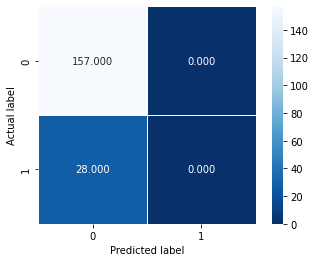

In [11]:
import sklearn
cm = sklearn.metrics.confusion_matrix(y, a)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
    
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {conf_accuracy}') 
print(f'Mis-Classification: {conf_misclassification}') 
print(f'Sensitivity: {conf_sensitivity}') 
print(f'Specificity: {conf_specificity}') 
print(f'Precision: {conf_precision}')
print(f'f_1 Score: {conf_f1}')

In [12]:
df = pd.DataFrame(list(zip(id, y,a)),
               columns =['ID', 'Expected_MH','Predicted_MH'])

df.head()
df.to_csv("MH_results.csv")